3-4

In [2]:
%pip install numpy
%pip install pandas
%pip install pickle
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import pickle

3層ニューラルネットの実装

In [4]:
#設計
def sigmoid(x):
    return 1/(1+np.exp(-x))
def identity_function(x):
    return x
def init_network():
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])

    return network
def forward(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']

    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=identity_function(a3)

    return y

In [5]:
#実装
network=init_network()
x=np.array([1.0,0.5])
forward(network,x)

array([0.31682708, 0.69627909])

3-5 出力層の設計

In [6]:
a=np.array([0.3,2.9,4.0])
exp_a=np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [7]:
sum_exp_a=sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [8]:
exp_a/sum_exp_a

array([0.01821127, 0.24519181, 0.73659691])

In [9]:
#ソフトマックス関数の実装(仮)
def softmax(a):
    exp_a=np.exp(a)
    exp_a_sum=sum(exp_a)
    return exp_a/exp_a_sum

In [10]:
a=np.array([1010,1000,990])
softmax(a)
c=np.max(a)
np.exp(a-c)/np.sum(np.exp(a-c))

/var/folders/4s/g5jfy6yd0r5d8pcvsfwjr7v00000gn/T/ipykernel_43546/2100727282.py:3: RuntimeWarning: overflow encountered in exp
  exp_a=np.exp(a)
/var/folders/4s/g5jfy6yd0r5d8pcvsfwjr7v00000gn/T/ipykernel_43546/2100727282.py:5: RuntimeWarning: invalid value encountered in divide
  return exp_a/exp_a_sum


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [11]:
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    exp_a_sum=np.sum(exp_a)
    y=exp_a/exp_a_sum

    return y

In [12]:
a=np.array([0.3,2.9,4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [13]:
np.sum(softmax(a))

np.float64(1.0)

3-6　手書き数字認識

In [14]:
import sys, os

# カレントディレクトリ確認
print("CWD:", os.getcwd())

# すでに追加されてるsys.pathを確認（デバッグ用）
print("Before sys.path:", sys.path)

# 一度重複を防ぐためにクリア（必要なら）
while './deep-learning-from-scratch-master' in sys.path:
    sys.path.remove('./deep-learning-from-scratch-master')

# 絶対パスを追加（ここが最重要！）
abs_path = '/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/deep-learning-from-scratch-master'
if abs_path not in sys.path:
    sys.path.insert(0, abs_path)

print("After sys.path:", sys.path)

# ここでimport（失敗したらエラー出る）
from dataset.mnist import load_mnist

print("✅ import成功！")

CWD: /Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning
Before sys.path: ['/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/venv/lib/python3.12/site-packages']
After sys.path: ['/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/deep-learning-from-scratch-master', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/venv/lib/python3.12/site-packages']
✅ import成功！


In [15]:
def get_data():
    (x_train,t_train),(x_test,t_test)=\
        load_mnist(normalize=True,flatten=True,one_hot_label=False)
    return x_test,t_test
def init_network():
    with open('/Users/tanaamidaisuke/Documents/python_code/self_learinng/Deeplearning/deep-learning-from-scratch-master/ch03/sample_weight.pkl','rb') as f:
        network=pickle.load(f)
    return network
def predict(network,x):
    W1,W2,W3=network['W1'],network['W2'],network['W3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']

    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=softmax(a3)

    return y

In [16]:
x,t=get_data()
network=init_network()

accuracy_cnt=0
for i in range(len(x)):
    y=predict(network,x[i])
    p=np.argmax(y) 
    if p==t[i]:
        accuracy_cnt += 1
print('accuracy'+str(accuracy_cnt/len(x)))


accuracy0.9352


In [17]:
x,_=get_data() #画像のデータと正解ラベルがある
network=init_network()
W1,W2,W3=network['W1'],network['W2'],network['W3']

In [18]:
x,t=get_data()
network=init_network()

batch_size=100
accuracy_cnt=0

for i in range(0,len(x),batch_size): #100刻みにiをとってくる
    x_batch=x[i:i+batch_size]
    y_batch=predict(network,x_batch)
    p=np.argmax(y_batch,axis=1) #最大の値のインデックス
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print(accuracy_cnt/len(x))


0.9352


4 ニューラルネットワークの学習

In [19]:
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t=[0,0,1,0,0,0,0,0,0,0]

In [20]:
# 損失関数の実装　これの値が小さい方が損失小さい→良い
def sum_squard_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [21]:
sum_squard_error(np.array(y),np.array(t))

np.float64(0.09750000000000003)

In [22]:
def cross_entropy_error(y,t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta))

In [23]:
cross_entropy_error(np.array(y),np.array(t))

np.float64(0.510825457099338)

In [24]:
(x_train,t_train),(x_test,y_test)=load_mnist(normalize=True,one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [25]:
train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size,batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

In [26]:
# y,tがバッチの時のクロスエントロピー誤差
def cross_entropy_error(y,t):
    delta=1e-7
    if y.ndim==1: #列持ちから行持ちに変更することで一括で処理できるようにする
        y=y.reshape(1,y.size)
        t=t.reshape(1,t.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+delta))/batch_size
    

In [27]:
# 微分のコード

def numerical_diff(f,x):
    h=1e-4
    return (f(x+h)-f(x-h))/(2*h)

In [28]:
def function_1(x):
    return 0.01*x**2+0.1*x

In [29]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [30]:
import matplotlib.pyplot as plt

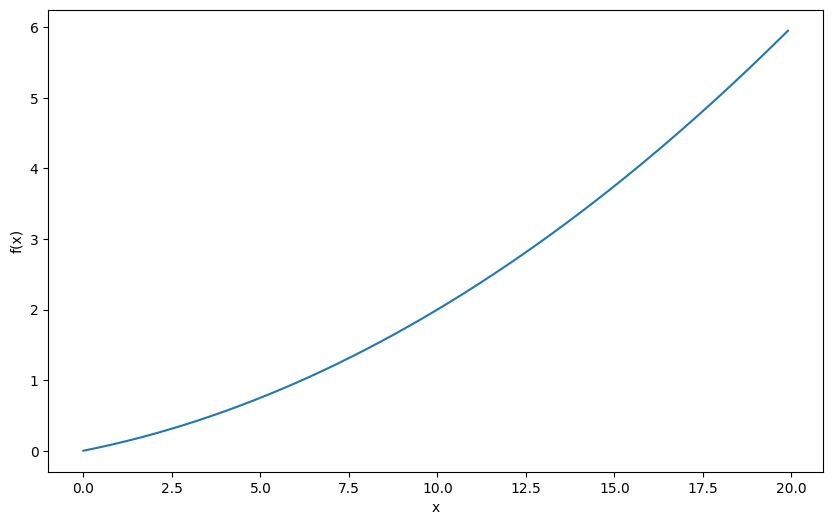

In [31]:
plt.figure(figsize=(10,6))
x=np.arange(0,20,0.1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,function_1(x))

In [32]:
numerical_diff(function_1,5)

0.1999999999990898

In [33]:
numerical_diff(function_1,10)

0.2999999999986347

In [34]:
def function_2(x):
    return x[0]**2+x[1]**2

In [35]:
def numerical_gradient(f,x):
    #xとして与えるのは偏微分を求める点の配列 偏微分の配列を返す
    h=1e-4
    grad=np.zeros(x.shape[0])
    for idx in range(x.size):#各変数ごとに処理を回す
        tmp_val=x[idx]
        x[idx]=tmp_val+h
        fxh1=f(x)

        x[idx]=tmp_val-h
        fxh2=f(x)

        grad[idx]=(fxh1-fxh2)/(2*h) #偏微分を入れる配列にぶち込む　右辺はidxについての偏微分
        x[idx]=tmp_val

    return grad

In [36]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [37]:
#極小となるxを求める勾配降下法を行っている
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x=x-lr*grad
    return x

In [38]:
def function_2(x):
    return np.sum(x**2)

In [39]:
gradient_descent(function_2,np.array([-3,4]),lr=0.1)

array([ 6.35809854e-07, -8.90184721e-07])

In [40]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet: #一層のニューラルネットワーク
    def __init__(self): 
        self.W=np.random.randn(2,3) #Wは重みを表すもの
    
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y,t)

        return loss

In [41]:
net=simpleNet()
print(net.W)
x=np.array([0.6,0.9])
p=net.predict(x)
print(p) 

[[ 0.75372754 -0.1376615   1.74368028]
 [ 0.50360213 -1.37413409 -1.15545521]]
[ 0.90547844 -1.31931758  0.00629848]


In [42]:
t=np.array([0,0,1])
net.loss(x,t)

np.float64(1.3145901877824973)

In [43]:
def f(W):
    return net.loss(x,t)
dW=numerical_gradient(f,net.W)
print(dW)

[[ 0.39604137  0.0428079  -0.43884927]
 [ 0.59406206  0.06421185 -0.65827391]]


In [44]:
#適当に重みを作って、その数字を元に勾配降下をして最適解を見つけるっていう時間

In [45]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:

    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.1):
        #重みの初期化
        self.params={}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size) #行列の形でW1を持つ
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
    
    def predict(self,x):
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']

        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2
        y=softmax(a2)

        return y

    def loss(self,x,t): #クロスエントロピー誤差
        y=self.predict(x)

        return cross_entropy_error(y,t)

    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)
        t=np.argmax(t,axis=1)

        accuracy=np.sum(y==t)/float(x.shape[0])
        return accuracy

    def numerical_gradient(self,x,t): #損失関数に対する偏微分の配列を返す→損失関数を最小にするパラメーターを求めたいから！
        loss_W=lambda W : self.loss(x,t) #損失関数

        grads={}
        grads['W1']=numerical_gradient(loss_W,self.params['W1'])
        grads['b1']=numerical_gradient(loss_W,self.params['b1'])     
        grads['W2']=numerical_gradient(loss_W,self.params['W2'])     
        grads['b2']=numerical_gradient(loss_W,self.params['b2'])     

        return grads
        

In [46]:
net=TwoLayerNet(input_size=784,hidden_size=100,output_size=10) #28*28の画像のデータ,隠れ層100、ラベル10
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)

In [47]:
###
(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)
train_loss_list=[]

iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

network=TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
#バッチの作成
#for i in range(iters_num):
    #batch_mask=np.random.choice(train_size,batch_size)
    #x_batch=x_train[batch_mask]
    #t_batch=t_train[batch_mask]

    #勾配の計算
    #grad=network.numerical_gradient(x_batch,t_batch)

    #for key in ('W1','b1','W2','b2'):
        #network.params[key]=network.params[key]-learning_rate*grad[key] #パラメーターの損失関数に関する勾配を使ってパラメーターを更新

    #loss=network.loss(x_batch,t_batch)

   # train_loss_list.append(loss)
###

In [48]:
train_loss_list=[]
train_acc_list=[]
test_acc_list=[]
iter_per_epoch=max(train_size/batch_size,1)
network=TwoLayerNet(input_size=784,hidden_size=100,output_size=10)

for i in range(iters_num):
    batch_mask=np.random.choice(train_size,batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    
    #grad=network.numerical_gradient(x_batch,t_batch)

    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]

    loss=network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

    if i%iter_per_epoch==0:
        train_acc=network.accuracy(x_train,t_train)
        test_acc=network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)


NameError: name 'grad' is not defined

In [ ]:
#誤差逆転ぱん

In [49]:
class MulLayer:
    def __init__(self):
        self.x=None
        self.y=None
    def forward(self,x,y):
        self.x=x #このインスタンス内の変数として保存している
        self.y=y
        return x*y
    def backward(self,dout):
        dx=dout*self.y
        dy=dout*self.x

        return dx,dy

In [50]:
apple=100
apple_num=2
tax=1.1

mul_apple_layer=MulLayer() #二つインスタンス化する必要あんのか？？？
mul_tax_layer=MulLayer()

apple_price=mul_apple_layer.forward(apple,apple_num)
price=mul_apple_layer.forward(apple_price,tax)

print(price)

220.00000000000003


In [51]:
#逆転
dprice=1
dapple_price,dtax=mul_apple_layer.backward(dprice)
dapple,dapple_num=mul_apple_layer.backward(apple_price)
print(dapple,dapple_num,dtax,dapple_price)

220.00000000000003 40000 200 1.1


In [52]:
class AddLayer:
    def __init__(self):
        pass
    def forward(self,x,y):
        self.x=x
        self.y=y

        return x+y
    def backward(self,dout):

        dx=dout*1
        dy=dout*1

        return dx,dy

In [53]:
apple_num=2
apple=100
orange_num=3
orange=150
tax=1.1

mul_apple_layer=MulLayer()
mul_orange_layer=MulLayer()
add_layer=AddLayer()
mul_tax_layer=MulLayer()

apple_price=mul_apple_layer.forward(apple_num,apple)
orange_price=mul_orange_layer.forward(orange_num,orange)
all_price=add_layer.forward(apple_price,orange_price)
price=mul_tax_layer.forward(all_price,tax)

dprice=1
dall_price,dtax=mul_tax_layer.backward(dprice)
dapple_price,dorange_price=add_layer.backward(dall_price)
dapple_num,dapple=mul_apple_layer.backward(dapple_price)
dorange,dorange_num=mul_orange_layer.backward(dorange_price)

print(price)
print(dapple_num,dapple,dorange,dorange_num,dtax)


715.0000000000001
110.00000000000001 2.2 165.0 3.3000000000000003 650


In [ ]:
#ニューラルネットを計算グラフで表そう

In [54]:
class Relu:
    def __init__(self):
        self.mask=None
    def forward(self,x):
        self.mask=(x<=0)
        out=x.copy()
        out[self.mask]=0

        return out
    def backward(self,dout):
        dout[self.mask]=0
        dx=dout

        return dout

In [55]:
class sigmoid:
    def __init__(self):
        self.out=None
    def forward(self,x):
        out=1/(1+np.exp(-x))
        self.out=out

        return out
    def backward(self,dout):
        dx=dout*(1.0-self.out)*self.out #self.outに結果を保持しているからできる self.outはyと等しい

        return dx

In [56]:
class Affine:
    def __init__(self,W,b):
        self.W=W
        self.b=b
        self.x=None
        self.dW=None
        self.db=None

    def forward(self,x):
        self.x=x
        out=np.dot(x,self.W)+self.b

        return out
    
    def backward(self,dout):
        dx=np.dot(dout,self.W.T)
        self.dW=np.dot(self.x.T,dout) #ここから下のところいらなくないか
        self.db=np.sum(dout,axis=0)

        return dx

In [57]:
class SoftmaxWithloss:
    def __init__(self):
        self.loss=None #損失
        self.y=None #ソフトマックスの出力
        self.t=None #正解ラベル（ワンホット）

    def forward(self,x,t):
        self.t=t
        self.y=softmax(x)
        self.loss=cross_entropy_error(self.y,self.t)

        return self.loss
    
    def backward(self,dout=1):
        batch_size=self.t.shape[0]
        dx=(self.y-self.t)/batch_size

        return dx

In [ ]:
from common.gradient import numerical_gradient
from common.layers import *
from collections import OrderedDict

In [69]:
from common.multi_layer_net import MultiLayerNet

In [68]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params={}
        self.params['W1']=weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)

        self.layers=OrderedDict()
        self.layers['Affine1']=Affine(self.params['W1'],self.params['b1']) #下はインスタンス化
        self.layers['Relu1']=Relu()
        self.layers['Affine2']=Affine(self.params['W2'],self.params['b2'])

        self.lastLayer=SoftmaxWithloss() #最後の層はソフトマックス＋損失関数

    def predict(self,x):
        for layer in self.layers.values():
            x=layer.forward(x)

        return x
    
    def loss(self,x,t):
        y=self.predict(x)
        return self.lastLayer.forward(y,t)
    
    def accuracy(self,x,t):
        y=self.predict(x)
        y=np.argmax(y,axis=1)

        if t.ndim==1: t=np.argmax(t,axis=1)

        accuracy=np.sum(y==t)/float(x.shape[0])
        return accuracy
    
  
    def numerical_gradient(self,x,t): #損失関数に対する偏微分の配列を返す→損失関数を最小にするパラメーターを求めたいから！
        loss_W=lambda W : self.loss(x,t) #損失関数

        grads={}
        grads['W1']=numerical_gradient(loss_W,self.params['W1'])
        grads['b1']=numerical_gradient(loss_W,self.params['b1'])     
        grads['W2']=numerical_gradient(loss_W,self.params['W2'])     
        grads['b2']=numerical_gradient(loss_W,self.params['b2'])     

        return grads
    
    def gradient(self,x,t):

        #forward
        self.loss(x,t)

        #backward
        dout=1
        dout=self.lastLayer.backward(dout)

        layers=list(self.layers.values)
        layers.reverse()
        for layer in layers:
            dout=layer.backward(dout)

        grads={}
        grads['W1']=self.layers['Affine1'].dW
        grads['b1']=self.layers['Affine1'].db
        grads['W2']=self.layers['Affine2'].dW
        grads['b2']=self.layers['Affine2'].db

        return grads

In [ ]:
#パラメータの最適化

In [60]:
class SGD:
    def __init__(self,lr=0.01):
        self.lr=lr
    def update(self,params,grads):
        for key in params.keys():
            params[key] -=self.lr*grads[key] #勾配の急な方向に進みましょう

In [61]:
class Momentum:
    def __init__(self,lr=0.01,memontum=0.9):
        self.lr=lr
        self.momentum=Momentum
        self.v=None
    def update(self,params,grads):
        if self.v==None: #初めて呼ばれる時に、パラメーターと同じ構造を辞書型で作る。
            self.v={}
            for key,val in params.items():
                self.v[key]=np.zeros_like(val)
        for key in params.keys():
            self.v[key]=self.momentum*self.v[key]-self.lr*grads[key]
            self.params[key] += self.v[key]

In [62]:
class AdaGrad: #学習率を変えられますよってやつ
    def __init__(self,lr=0.01):
        self.lr=lr
        self.h=None
    def forward(self,params,grads):
        if self.h==None:
            self.h={}
            for key,val in params.item():
                self.h[key]=np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key]*grads[key]
            params[key] = params[key] - self.lr*grads[key]/(np.sqrt(self.h[key])+1e-7)

In [63]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [64]:
import matplotlib.pyplot as plt

In [65]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.random.randn(1000,100) #1000個のデータ
node_num=100
hidden_layer_size=5
activations={}
for i in range(hidden_layer_size):
    if i!=0:
        x=activations[i-1] #一層目以外は前の出力をそのまま次に渡す（一層目は初期値があるから良い）
    w=np.random.randn(node_num,node_num)/np.sqrt(node_num)
    z=np.dot(x,w)
    a=sigmoid(z)
    activations[i]=a

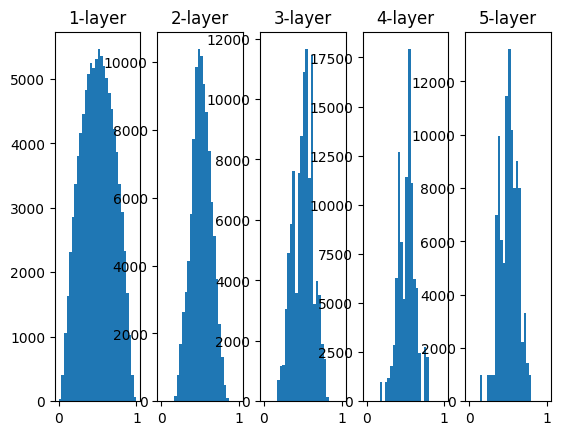

In [66]:
for i, a in activations.items():
    plt.subplot(1,len(activations),i+1)
    plt.title(str(i+1)+'-layer')
    plt.hist(a.flatten(),30,range=(0,1))

In [67]:
(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True)
x_train=x_train[:300]
t_train=t_train[:300]

In [71]:
network=MultiLayerNet(input_size=784,hidden_size_list=[100,100,100,100,100,100],output_size=10)
optimizer=SGD(lr=0.01)
max_epochs=201
train_size=x_train.shape[0]
batch_size=100

train_loss_list=[]
train_acc_list=[]
test_acc_list=[]
iter_per_epoch=max(train_size/batch_size,1)
epoch_cnt=0

for i in range(1000000):
    batch_mask=np.random.choice(train_size,batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]

    grads=network.gradient(x_batch,t_batch)
    optimizer.update(network.params,grads)

    if i % iter_per_epoch==0:
        train_acc=network.accuracy(x_train,t_train)
        test_acc=network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt +=1
        if epoch_cnt >= max_epochs:
            break

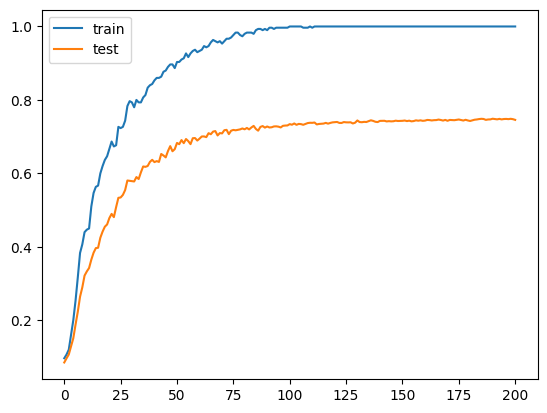

In [ ]:
plt.plot(np.arange(epoch_cnt),train_acc_list,label='train')
plt.plot(np.arange(max_epochs),test_acc_list,label='test')
plt.legend() #明らかに過学習している！

In [ ]:
#drop_out

In [ ]:
class Dropout:
    def __init__(self,dropout_ratio=0.5):
        self.dropout_ratio=dropout_ratio
        self.mask=None
    def forward(self,x,train_flg=True):
        if train_flg:
            self.mask=np.random.rand(*x.shape)>self.dropout_ratio #ランダムでtrue,falseを生成する0.1とかだったらほとんどfalseになっちゃう
            return x*self.mask #ブール値はTrue→1 False→0で解釈されるから、単純にかけるだけでニューロン消せる
        else:
            return x*(1.0-self.dropout_ratio) #trainじゃないとき、xに消去した割合を乗算する
        
    def backward(self,dout):
        return dout*self.mask

In [ ]:
#ハイパーパラメータ

In [79]:
from common.util import shuffle_dataset

In [81]:
(x_train,t_train),(x_test,t_test)=load_mnist()

x_train,t_train=shuffle_dataset(x_train,t_train)
validation_rate=0.2
validation_num=int(len(x_train)*validation_rate)

x_val=x_train[:validation_num]
t_val=x_train[:validation_num]
x_train=x_train[validation_num:]
t_train=t_train[validation_num:]

In [93]:
weight_decay=10**np.random.uniform(-8,-4)
lr=10**np.random.uniform(-6,-2)

In [94]:
weight_decay

9.557319098930924e-08

In [ ]:
import numpy as np

def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    input_data : (N, C, H, W) の 4次元配列（N: データ数, C: チャンネル数）
    filter_h : フィルタの高さ
    filter_w : フィルタの幅
    stride : ストライド
    pad : パディング

    Returns
    -------
    col : 2次元配列 (N*out_h*out_w, C*filter_h*filter_w)
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1 #出力層の高さの形の設計
    out_w = (W + 2*pad - filter_w)//stride + 1 #出力層の横の形の設計

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant') #padding
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w)) #あとで二次元に直す

    for y in range(filter_h):
        y_max = y + stride*out_h #フィルターの上がyの時の高さのはじ
        for x in range(filter_w):
            x_max = x + stride*out_w #↑の時にフィルターの左端がxの時の右端
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride] #フィルタをかけた時のパッチをスライスを利用して取り出している！

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1) #行方向は各パッチの値を１行にまとめたもの。列方向はパッチ内での位置関係
    return col


In [ ]:
from common.util import im2col #パッチとフィルタを行、列の形にまとめることで計算を行列積で表せるようにしている
x1=np.random.rand(1,3,7,7) #チャネル7 9✖️9のデータが一つあるよ
col1=im2col(x1,5,5,stride=1,pad=0) #データに重みをかけたものを二次元データに変更

In [99]:
print(col1.shape)

(9, 75)


In [100]:
x2=np.random.rand(10,3,7,7)
col2=im2col(x2,5,5,stride=1,pad=0)
print(col2.shape)

(90, 75)


In [ ]:
class Convolution:
    def __init__(self,W,b,stride=1,pad=0):
        self.W=W
        self.b=b
        self.pad=pad
        self.stride=stride
    def forward(self,x):
        FN,C,FH,FW=self.W.shape
        N,C,H,W=x.shape
        out_h=int(1+(H+2*self.pad-FH)//self.stride)
        out_w=int(1+(W+2*self.pad-FW)//self.stride)
        col=im2col(x,FH,FW,self.stride,self.pad)  #行にバッチ（フィルターをかけた時の値を１行にしたやつ）、列にフィルターの中の位置を入れてるもの、(N*out_h*out_w,C*FH*FW)
        col_W=self.W.reshape(FN,-1).T #フィルターを一列に並べたものをいっぱい集めた行列 (C*FH*FW,FN)
        out=np.dot(col,col_W)+self.b

        out=out.reshape(N,out_h,out_w,-1).transpose(0,3,1,2) #(N,C,H,W)の形に戻している
        return out

In [103]:
class Pooling:
    def __init__(self,pool_h,pool_w,stride=2,pad=0):
        self.pool_h=pool_h
        self.pool_w=pool_w
        self.stride=stride
        self.pad=pad
    def forward(self,x):
        N,C,H,W=x.shape
        out_h=int(1+(H-self.pool_h+2*self.pad)//self.stride)
        out_w=int(1+(W-self.pool_w+2*self.pad)//self.stride)

        col=im2col(x,self.pool_h,self.pool_w,self.stride,self.pad)
        col=col.reshape(-1,self.pool_h*self.pool_w) #行は知らんけど列はpoolの形

        out=np.max(col,axis=1)

        out=out.reshape(N,out_h,out_w,C).transpose(0,3,1,2)

        return out
